In [1]:
import math #operazioni matematiche complesse
import numpy as np #matrici e vettori
import pandas as pd #dataframe
import scipy.stats as stats
import matplotlib.pyplot as plt #plot
import seaborn as sns #plot
from collections import defaultdict
from scipy.stats import pearsonr
import os

C:\Users\Noemi\AppData\Local\Temp\ipykernel_23028\3276683327.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #dataframe


In [2]:
def load_npy(filename):
    with open(filename, 'rb') as f:
        return np.load(f)

In [3]:
pd.set_option('display.max_columns', None)
dfA = pd.read_csv('dataset/tabular/artists.csv', skipinitialspace=True) 
dfT = pd.read_csv('dataset/tabular/tracks.csv', skipinitialspace=True) 

In [4]:
lista=[]
time_series='dataset/time_series'
for file in os.listdir(time_series):
    #print(load_npy("dataset/time_series/"+file))
    lista.append(load_npy("dataset/time_series/"+file))

In [5]:
dfA.head()

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."


In [6]:
dfA.describe()

,popularity,followers
count,30140.000000,3.014000e+04
mean,36.659788,4.168663e+05
std,17.229059,2.484219e+06
min,0.000000,0.000000e+00
25%,24.000000,1.472000e+03
50%,37.000000,1.581450e+04
75%,49.000000,1.186392e+05
max,100.000000,1.141635e+08


In [7]:
dfT.head()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,2017-09-22,day,13,0.532,0.517,0,-9.846,1,0.4930,0.5470,0.535,0.0854,0.2390,186.001,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,2014-10-27,day,8,0.750,0.340,5,-12.759,0,0.0326,0.1670,0.648,0.1060,0.1450,120.016,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,2018-06-22,day,10,0.801,0.639,7,-10.681,0,0.1040,0.0290,0.466,0.0688,0.3200,118.052,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,7,0.675,0.543,6,-11.983,0,0.0639,0.0484,0.719,0.1120,0.0374,128.990,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,13,0.761,0.671,11,-13.346,0,0.0418,0.5130,0.917,0.1150,0.1190,120.003,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno


In [8]:
dfT.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars
count,109547.000000,1.095470e+05,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,1.095470e+05,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000
mean,1.025094,2.277441e+05,31.545163,8.585566,18.726300,0.565535,0.638606,5.309703,-8.323598,0.640027,0.084741,0.319907,0.157710,0.214593,0.475156,122.113630,2.277364e+05,3.901604,219.960962,0.446597,0.882240,0.488477,0.510913,456.712626,116.965403
std,0.266291,9.761682e+04,22.943352,18.750768,31.688967,0.173935,0.252942,3.562289,5.071837,0.479994,0.106613,0.334382,0.311296,0.191866,0.259731,30.133061,9.761514e+04,0.436984,96.174360,0.300407,0.211984,0.247190,0.181409,224.652318,59.707947
min,1.000000,8.586000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,8.586670,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,1.000000,1.740020e+05,12.000000,1.000000,6.000000,0.454000,0.467000,2.000000,-10.104000,0.000000,0.035800,0.017200,0.000000,0.098100,0.261000,98.942000,1.740020e+05,4.000000,167.433290,0.172000,0.867000,0.322000,0.399000,315.000000,80.000000
50%,1.000000,2.131790e+05,32.000000,4.000000,12.000000,0.579000,0.681000,5.000000,-7.052000,1.000000,0.048800,0.176000,0.000042,0.132000,0.465000,121.997000,2.131730e+05,4.000000,205.560460,0.418000,0.990000,0.506000,0.522000,417.000000,106.000000
75%,1.000000,2.620130e+05,49.000000,10.000000,21.000000,0.693500,0.853000,8.000000,-5.036000,1.000000,0.084400,0.608000,0.051000,0.275000,0.684000,140.113500,2.620130e+05,4.000000,253.262955,0.730000,1.000000,0.665000,0.636000,554.000000,142.000000
max,14.000000,4.120258e+06,95.000000,475.000000,495.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,4.120258e+06,5.000000,4106.339000,1.000000,1.000000,1.454000,1.000000,7348.000000,2170.000000


In [9]:
dfT.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [10]:
dfA.columns

Index(['id', 'name', 'popularity', 'followers', 'genres'], dtype='object')

In [11]:
# drop: id (both), feature_duration_ms
# normalize: popolarity? loudness?, mode confidence, key confidence

# categorical: name, artists, album_name
# countable/boolean: explicit, track_number, album_type, album_release_date_precision, album_total_tracks, mode, time_signature, genre
# altro: album_release_date

In [11]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30141 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30140 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30140 non-null  float64
 3   followers   30140 non-null  float64
 4   genres      30140 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [12]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109547 entries, 0 to 109546
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            109547 non-null  object 
 1   name                          109547 non-null  object 
 2   disc_number                   109547 non-null  int64  
 3   duration_ms                   109547 non-null  int64  
 4   explicit                      109547 non-null  bool   
 5   popularity                    109547 non-null  int64  
 6   track_number                  109547 non-null  int64  
 7   artists                       109547 non-null  object 
 8   album_type                    109547 non-null  object 
 9   album_name                    109547 non-null  object 
 10  album_release_date            109547 non-null  object 
 11  album_release_date_precision  109547 non-null  object 
 12  album_total_tracks            109547 non-nul

In [13]:
dfA.isnull().sum()

id            1
name          2
popularity    1
followers     1
genres        1
dtype: int64

In [15]:
dfT.isnull().sum()

id                              0
name                            0
disc_number                     0
duration_ms                     0
explicit                        0
popularity                      0
track_number                    0
artists                         0
album_type                      0
album_name                      0
album_release_date              0
album_release_date_precision    0
album_total_tracks              0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
features_duration_ms            0
time_signature                  0
start_of_fade_out               0
tempo_confidence                0
time_signature_confidence       0
key_confidence

In [14]:
#palesemente preso da GPT perché non avevo voglia
df_righe_con_id_null = dfA.query('id.isnull()', engine='python')
print(df_righe_con_id_null)

        id name  popularity  followers genres
11872  NaN  NaN         NaN        NaN    NaN


In [15]:
dfA=dfA.dropna(subset=['id'])

In [16]:
dfA.isnull().sum()

id            0
name          1
popularity    0
followers     0
genres        0
dtype: int64

In [17]:
df_righe_con_name_null = dfA.query('name.isnull()', engine='python')
print(df_righe_con_name_null)

                           id name  popularity  followers genres
21223  4oPYazJJ1o4rWBrTw9lm40  NaN        47.0    35655.0     []


In [18]:
dfA=dfA.dropna(subset=['name'])
dfA.isnull().sum()

id            0
name          0
popularity    0
followers     0
genres        0
dtype: int64

In [19]:
dfA=dfA.drop(columns=['id'])
dfT=dfT.drop(columns=['id'])

<Axes: >

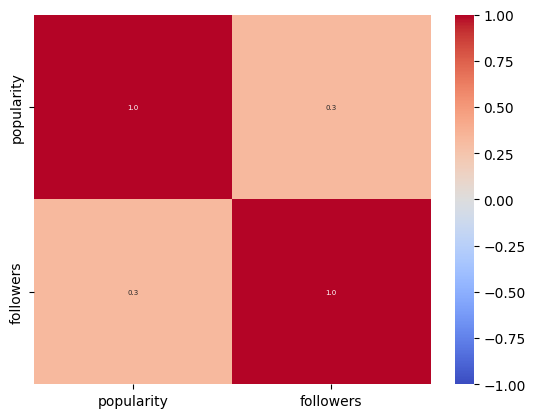

In [20]:
sns.heatmap(dfA.select_dtypes(include=['float64', 'int64']).corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':5}, fmt=".1f" )

<Axes: >

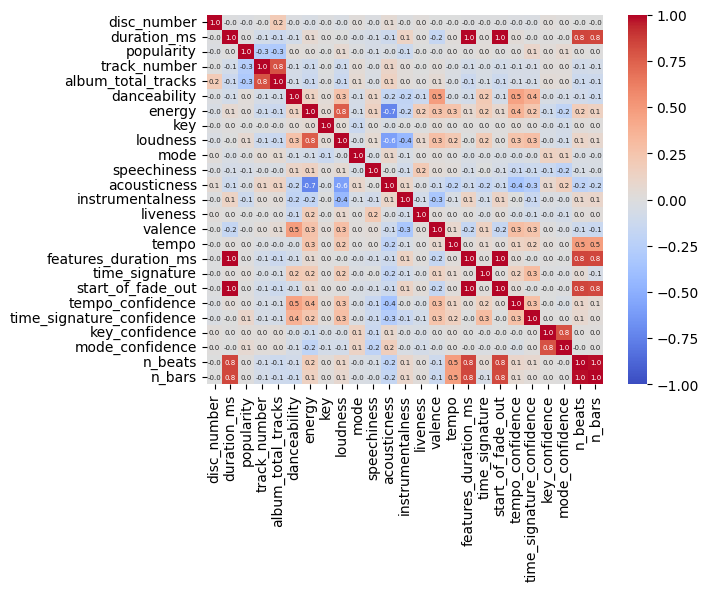

In [ ]:
sns.heatmap(dfT.select_dtypes(include=['float64', 'int64']).corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':5}, fmt=".1f" )

In [ ]:
# droppare n_bars/beats e start_fade_out

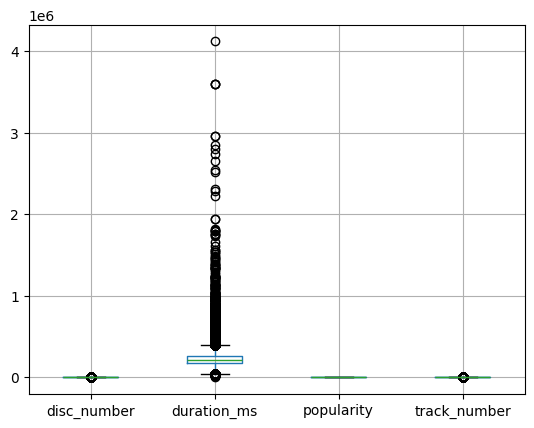

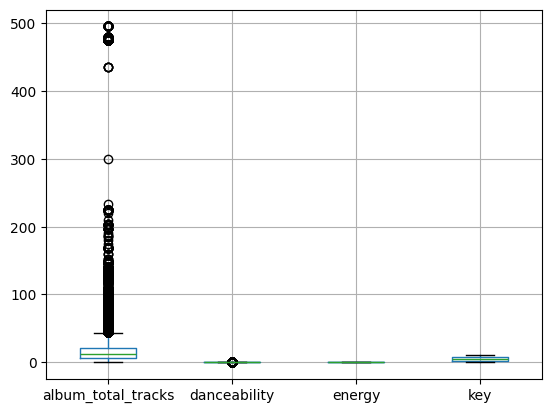

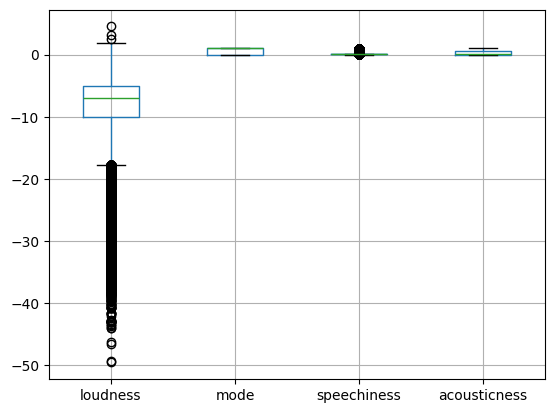

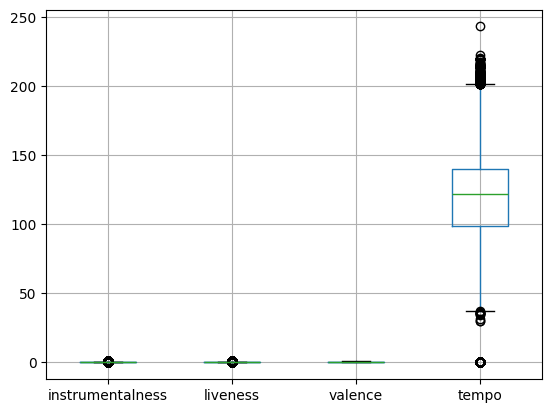

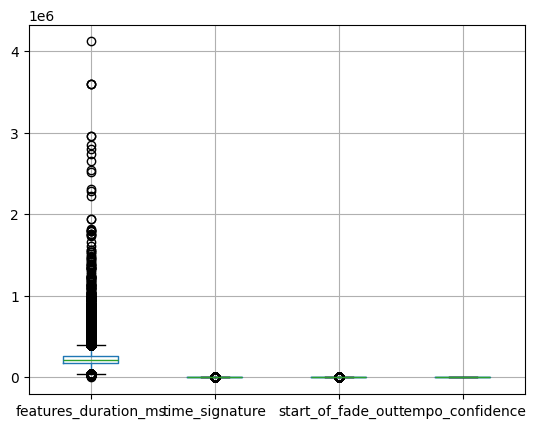

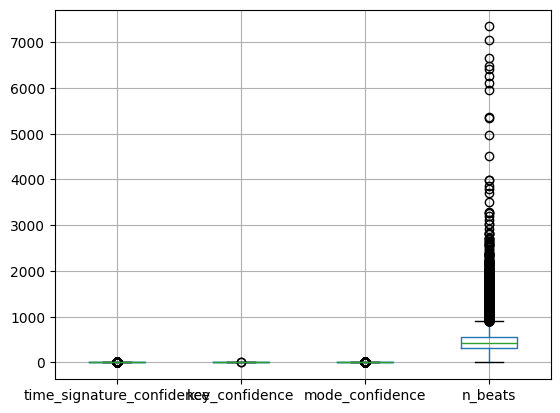

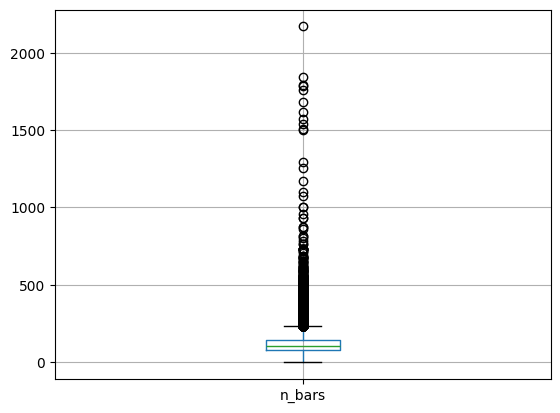

In [ ]:
chiavi=dfT.select_dtypes(include=['float64', 'int64']).keys()
for n in range(0, len(chiavi), 4):
    k=chiavi[n:(n+4)]
    sottodf=dfT[k]
    sottodf.boxplot()
    plt.show()

In [21]:
dfT=dfT.drop(['features_duration_ms', 'n_bars'], axis=1)

In [ ]:
dfT.head()

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre
0,Grey,1,290479,False,52,5,Kölsch,album,1989,2017-09-22,day,13,0.532,0.517,0,-9.846,1,0.4930,0.5470,0.535,0.0854,0.2390,186.001,3,275.90530,0.020,1.000,0.500,0.525,234.0,minimal-techno
1,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,2014-10-27,day,8,0.750,0.340,5,-12.759,0,0.0326,0.1670,0.648,0.1060,0.1450,120.016,4,517.28253,0.678,0.326,0.410,0.589,269.0,minimal-techno
2,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,2018-06-22,day,10,0.801,0.639,7,-10.681,0,0.1040,0.0290,0.466,0.0688,0.3200,118.052,3,259.04180,0.847,0.457,0.904,0.760,171.0,minimal-techno
3,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,7,0.675,0.543,6,-11.983,0,0.0639,0.0484,0.719,0.1120,0.0374,128.990,4,387.41360,0.882,0.498,0.512,0.503,207.0,minimal-techno
4,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,13,0.761,0.671,11,-13.346,0,0.0418,0.5130,0.917,0.1150,0.1190,120.003,4,239.63574,0.882,1.000,0.474,0.459,123.0,minimal-techno


In [23]:
artisti_con_virgola = dfA[dfA['name'].str.contains(';', na=False)]

# Stampare gli artisti con virgola nel nome
print(artisti_con_virgola['name'])

1568                            Sophiaaaahjkl;8901
17070    Royal Philharmonic Orchestra;David Arnold
Name: name, dtype: object


In [24]:
# Filtraggio degli artisti con virgola nel nome
artisti_con_virgola = dfT[dfT['artists'].str.contains('Sophiaaaahjkl;8901', na=False)]

# Stampare gli artisti con virgola nel nome
print(artisti_con_virgola['artists'])

93310    Fire-Toolz;Sophiaaaahjkl;8901
Name: artists, dtype: object


In [28]:
# Filtraggio degli artisti con virgola nel nome
artisti_con_virgola = dfT[dfT['artists'].str.contains('Royal Philharmonic Orchestra;David Arnold', na=False)]

# Stampare gli artisti con virgola nel nome
print(artisti_con_virgola['artists'])

Series([], Name: artists, dtype: object)


In [27]:
dfT['artists'] = dfT['artists'].str.split(';')

In [29]:
dfT['artists'] 

0                                   [Kölsch]
1                                  [Kiasmos]
2                          [Joris Delacroix]
3                  [Pan-Pot, Anfisa Letyago]
4                    [Kollektiv Turmstrasse]
                         ...                
109542    [David Guetta, Bebe Rexha, REAPER]
109543                         [Danny Avila]
109544                  [David Guetta, Akon]
109545                 [Diviners, Philly K.]
109546                                [King]
Name: artists, Length: 109547, dtype: object

In [26]:
def cerca_e_unisci_stringhe(array, stringa1, stringa2):
    if len(array)>1:
        if stringa1 in array and stringa2 in array:
            return stringa1 + ';' + stringa2
    return 

In [39]:
dfT['artists']

0                                   [Kölsch]
1                                  [Kiasmos]
2                          [Joris Delacroix]
3                  [Pan-Pot, Anfisa Letyago]
4                    [Kollektiv Turmstrasse]
                         ...                
109542    [David Guetta, Bebe Rexha, REAPER]
109543                         [Danny Avila]
109544                  [David Guetta, Akon]
109545                 [Diviners, Philly K.]
109546                                [King]
Name: artists, Length: 109547, dtype: object

In [46]:
# Funzione per controllare se il nome desiderato è presente nell'array degli artisti
def contiene_nome(artists, nome):
    return nome in artists

# Nome da cercare
nome_cercato = 'David Arnold'

# Applica la funzione per ogni riga del dataframe e restituisci un filtro booleano
filtro = dfT['artists'].apply(lambda x: contiene_nome(x, nome_cercato))

# Filtra le righe che soddisfano il filtro
righe_contenenti_nome = dfT[filtro]
print(righe_contenenti_nome)

Empty DataFrame
Columns: [name, disc_number, duration_ms, explicit, popularity, track_number, artists, album_type, album_name, album_release_date, album_release_date_precision, album_total_tracks, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, start_of_fade_out, tempo_confidence, time_signature_confidence, key_confidence, mode_confidence, n_beats, genre]
Index: []


In [42]:
def modifica_nome(artists, nome_da_cercare, nuovo_nome):
    for i, nome in enumerate(artists):
        if nome == nome_da_cercare:
            artists[i] = nuovo_nome
    return artists

def modifica_array(artists, nome_da_modificare):
    if nome_da_modificare in artists:
        artists.remove(nome_da_modificare)
    return artists

# Nome da cercare e nuovo nome da assegnare
nome_da_cercare = 'Royal Philharmonic Orchestra'
nuovo_nome = 'Royal Philharmonic Orchestra;David Arnold'
nome_cercato = 'David Arnold'

# Applica la funzione per ogni riga del dataframe
dfT['artists'] = dfT['artists'].apply(lambda x: modifica_nome(x, nome_da_cercare, nuovo_nome))
dfT['artists'] = dfT['artists'].apply(lambda x: modifica_array(x, nome_cercato))

print(dfT)

                                              name  disc_number  duration_ms  \
0                                             Grey            1       290479   
1                                           Thrown            1       539229   
2                                          Routine            1       264200   
3       Confronted - Anfisa Letyago Stranger Remix            1       387413   
4                                  Jupiter Sunrise            1       248956   
...                                            ...          ...          ...   
109542     I'm Good (Blue) - REAPER Extended Remix            1       209655   
109543                            End Of The Night            1       205724   
109544                     Sexy Bitch (feat. Akon)            1       195853   
109545                                    Savannah            1       208698   
109546                                      Dejalo            1       202826   

        explicit  popularity  track_num

In [47]:
# Nome da cercare e nuovo nome da assegnare
nome_da_cercare = 'Sophiaaaahjkl'
nuovo_nome = 'Sophiaaaahjkl;8901'
nome_cercato = '8901'

# Applica la funzione per ogni riga del dataframe
dfT['artists'] = dfT['artists'].apply(lambda x: modifica_nome(x, nome_da_cercare, nuovo_nome))
dfT['artists'] = dfT['artists'].apply(lambda x: modifica_array(x, nome_cercato))

print(dfT)

                                              name  disc_number  duration_ms  \
0                                             Grey            1       290479   
1                                           Thrown            1       539229   
2                                          Routine            1       264200   
3       Confronted - Anfisa Letyago Stranger Remix            1       387413   
4                                  Jupiter Sunrise            1       248956   
...                                            ...          ...          ...   
109542     I'm Good (Blue) - REAPER Extended Remix            1       209655   
109543                            End Of The Night            1       205724   
109544                     Sexy Bitch (feat. Akon)            1       195853   
109545                                    Savannah            1       208698   
109546                                      Dejalo            1       202826   

        explicit  popularity  track_num

In [48]:
dfT.to_csv("track_artisti_divisi.csv")